<a href="https://colab.research.google.com/github/Saumyaketu/Heart-Failure-Prediction/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, classification_report

Step 2 : Data Importing and Data Analysis


In [37]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [38]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


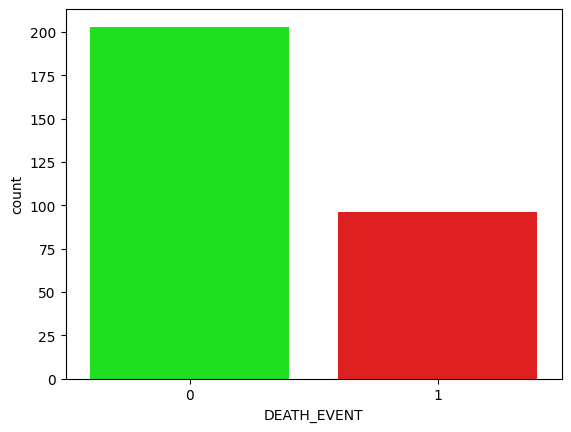

In [40]:
cols = ["#00FF00", "#FF0000"]
ax = sns.countplot(x="DEATH_EVENT", data=data_df, palette=cols, hue="DEATH_EVENT", legend=False)
# ax.bar_level(ax.containers[0]) # This line caused the error
# display(ax.figure)

In [41]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

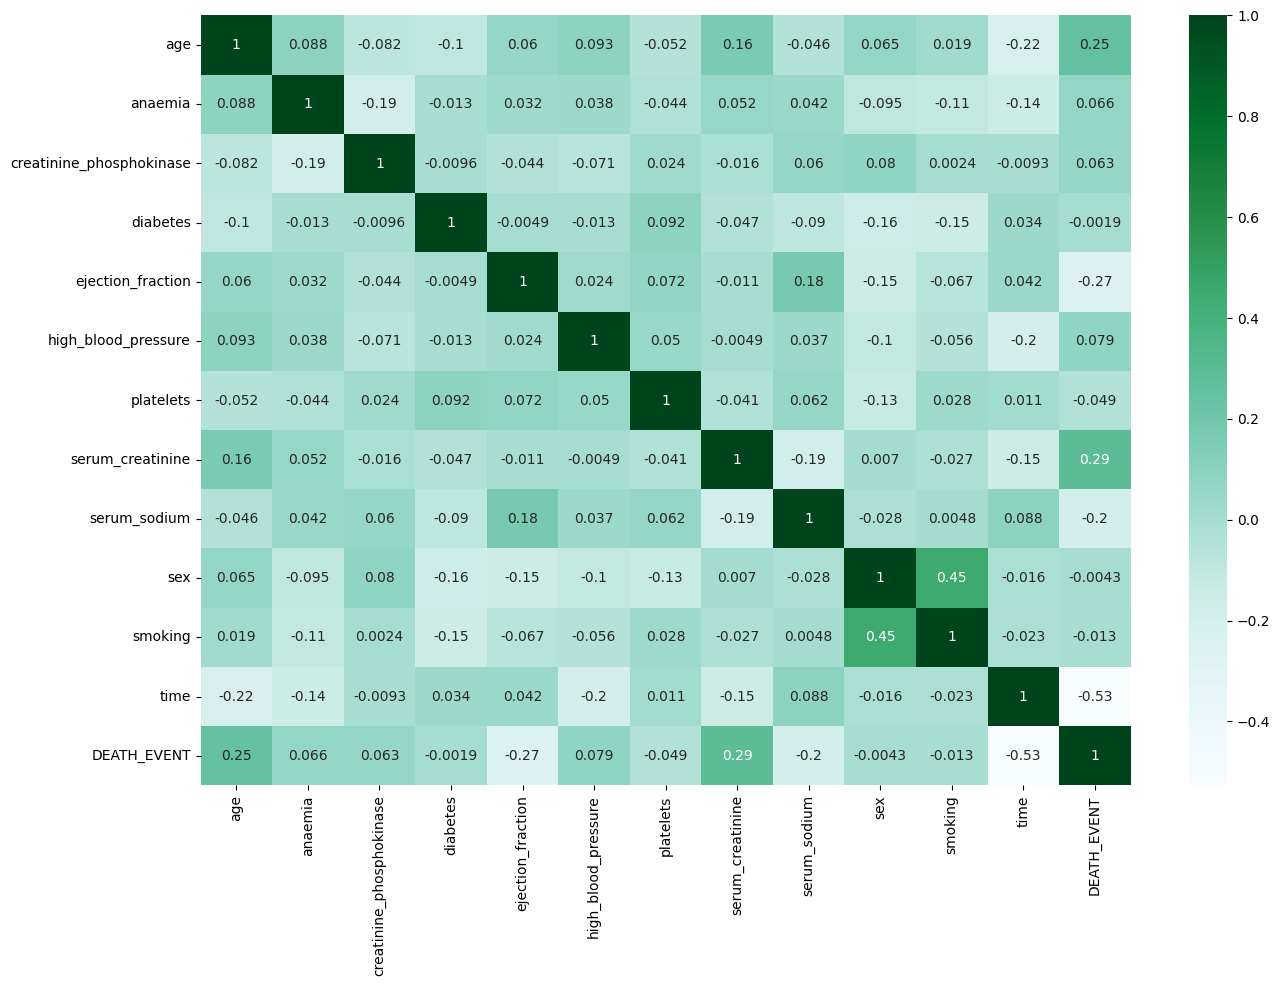

In [42]:
plt.subplots(figsize = (15, 10))
sns.heatmap(data_df.corr(), cmap = "BuGn", annot = True)

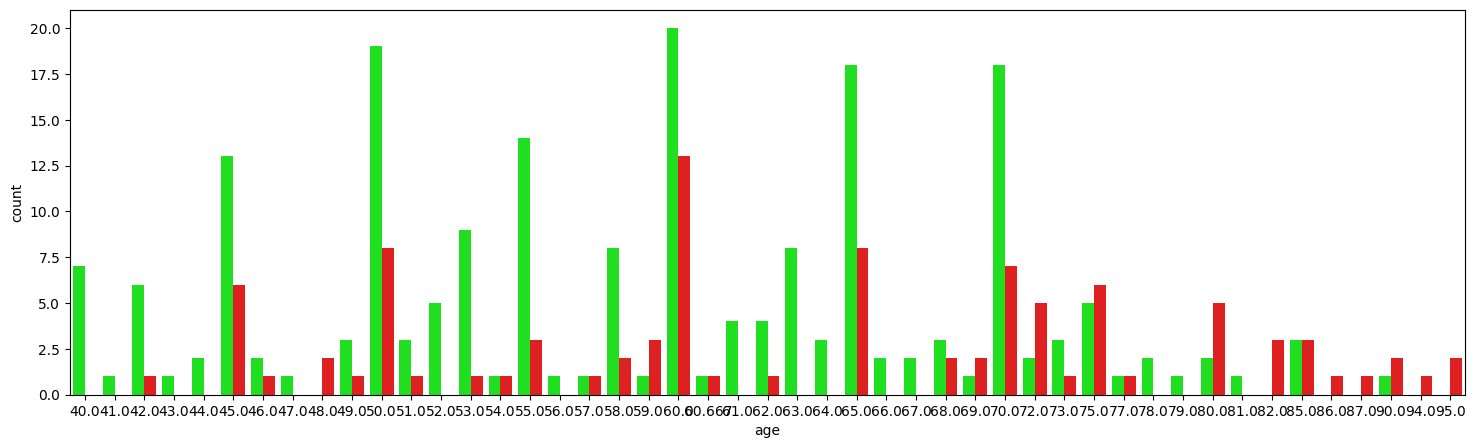

In [43]:
plt.figure(figsize=(18, 5))
days_of_week = sns.countplot(x=data_df['age'], data=data_df, palette=cols, hue="DEATH_EVENT", legend=False)

/tmp/ipython-input-44-3764727831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)


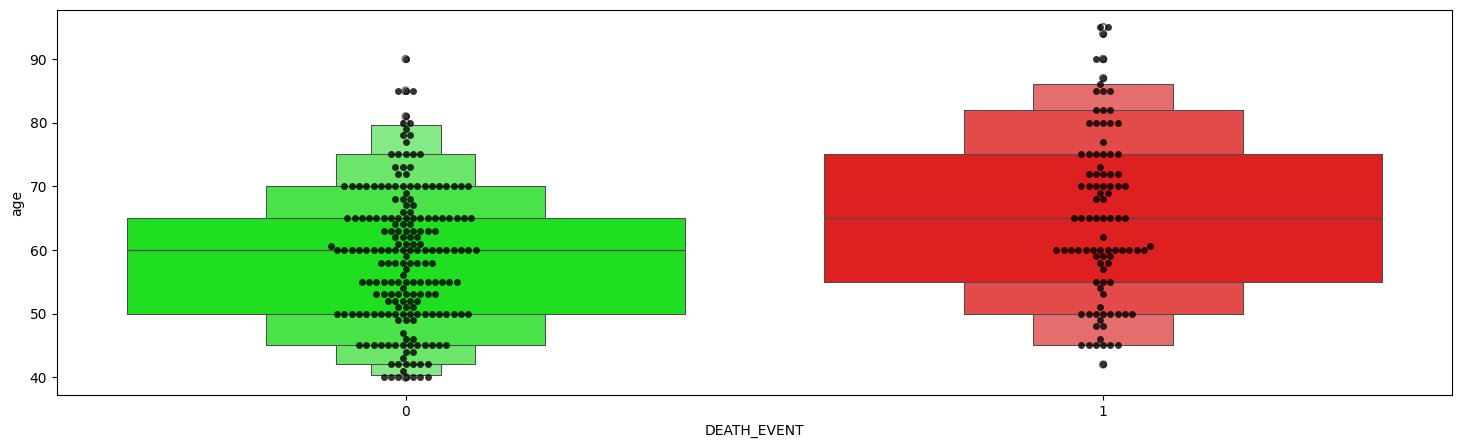

/tmp/ipython-input-44-3764727831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)


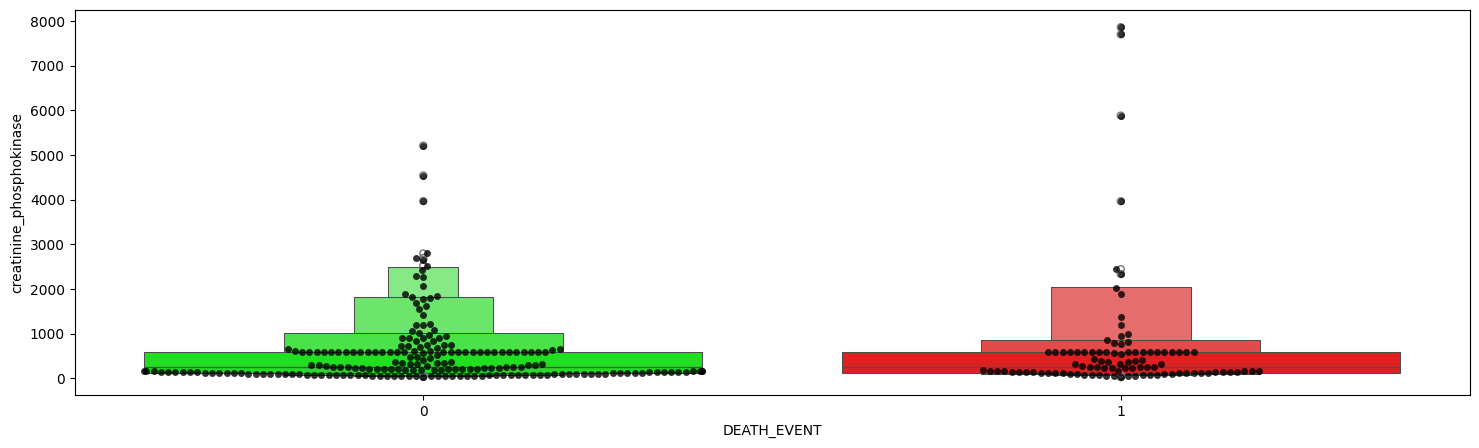

/tmp/ipython-input-44-3764727831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)


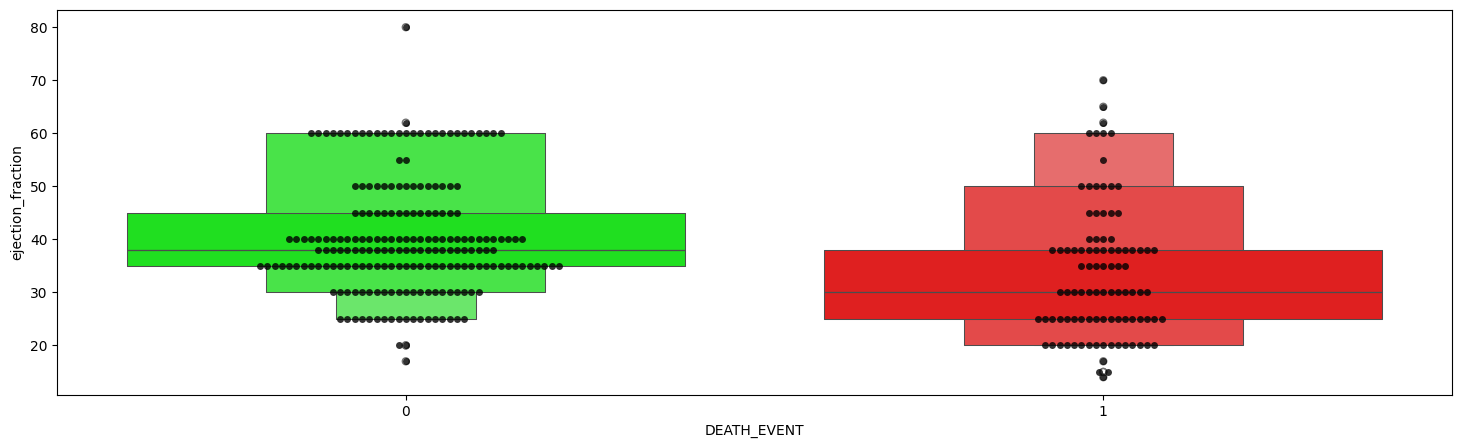

/tmp/ipython-input-44-3764727831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)


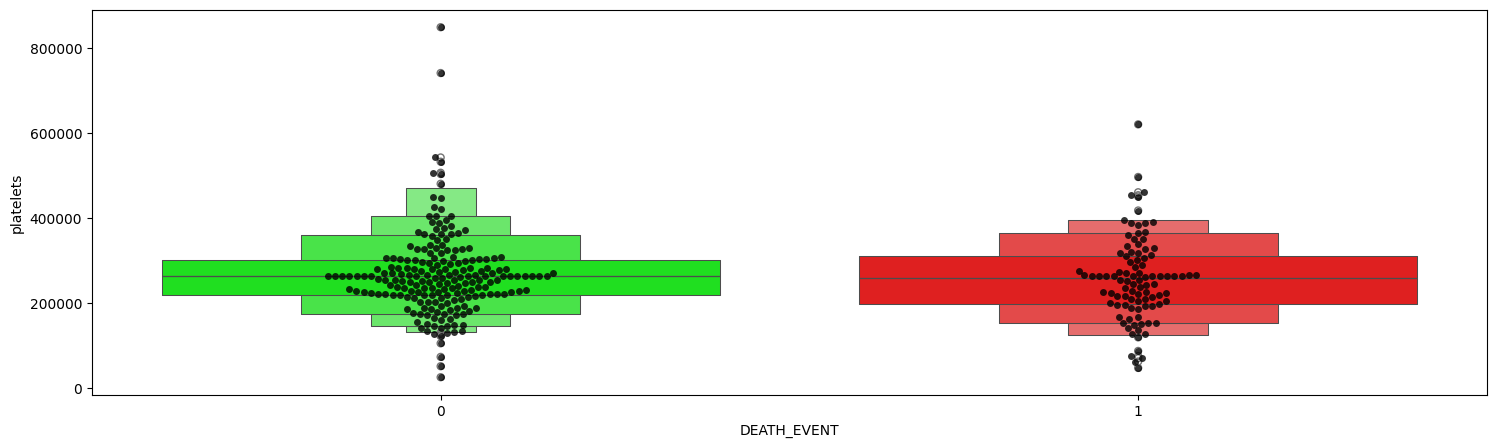

/tmp/ipython-input-44-3764727831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)


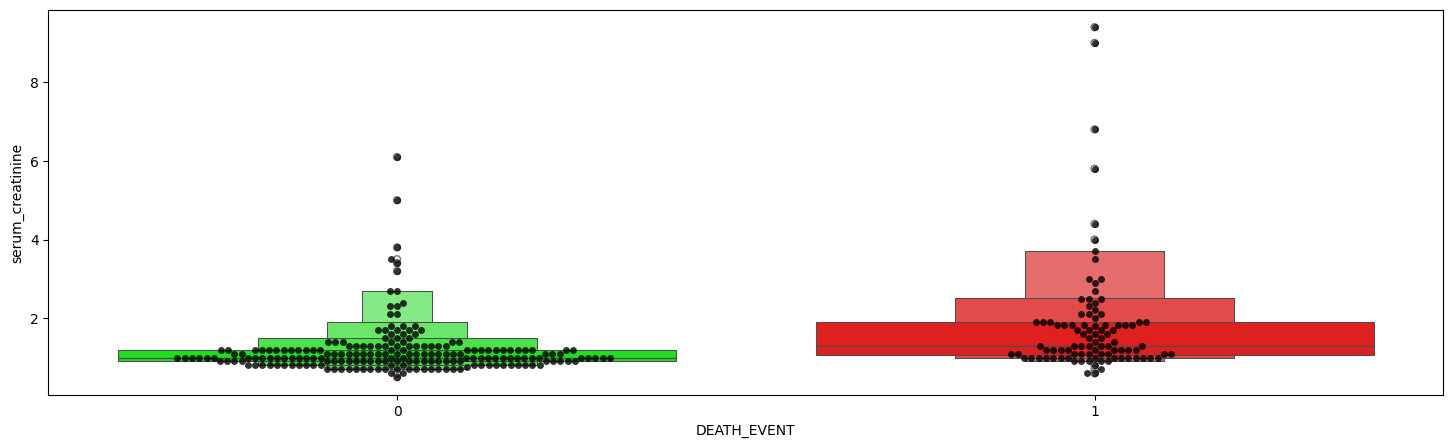

/tmp/ipython-input-44-3764727831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)


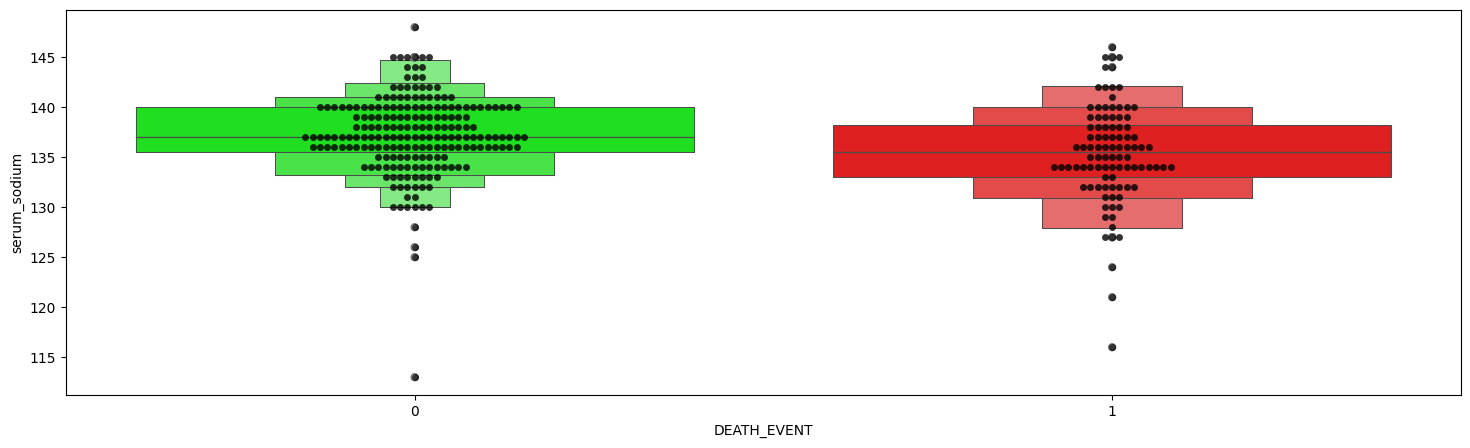

/tmp/ipython-input-44-3764727831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)


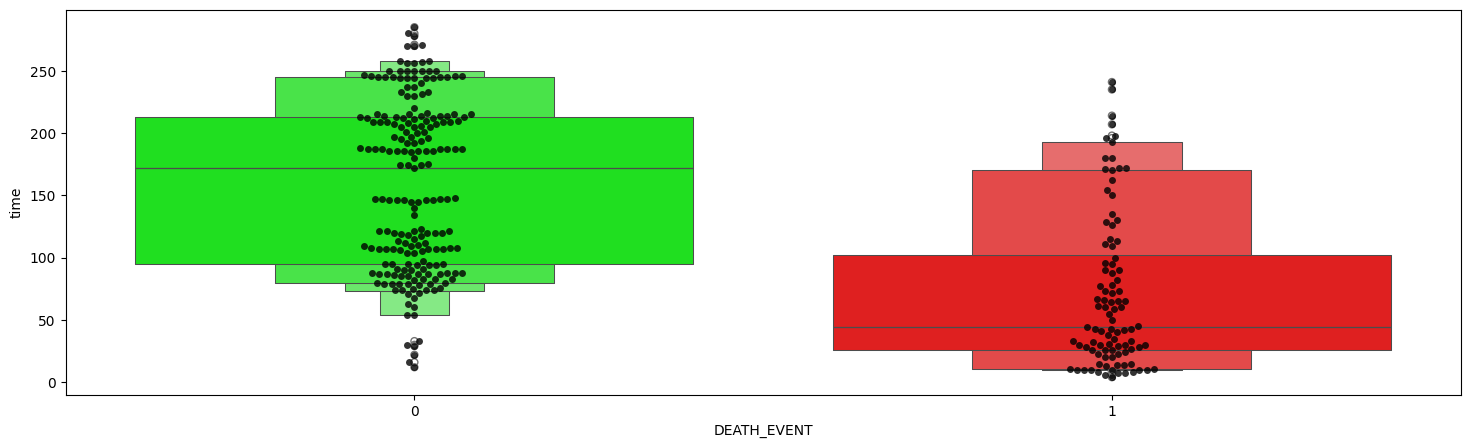

In [44]:
feature = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
for i in feature:
  plt.figure(figsize=(18, 5))
  sns.swarmplot(x = data_df["DEATH_EVENT"], y = data_df[i], color = "black", alpha = 0.8)
  sns.boxenplot(x = data_df["DEATH_EVENT"], y = data_df[i], palette = cols)
  plt.show()

Step 3 : Data Preprocessing

In [45]:
X = data_df.drop(["DEATH_EVENT"], axis = 1)
Y = data_df["DEATH_EVENT"]

In [46]:
col_name = list(X.columns)
s_scaler  = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = col_name)

In [47]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<Axes: >

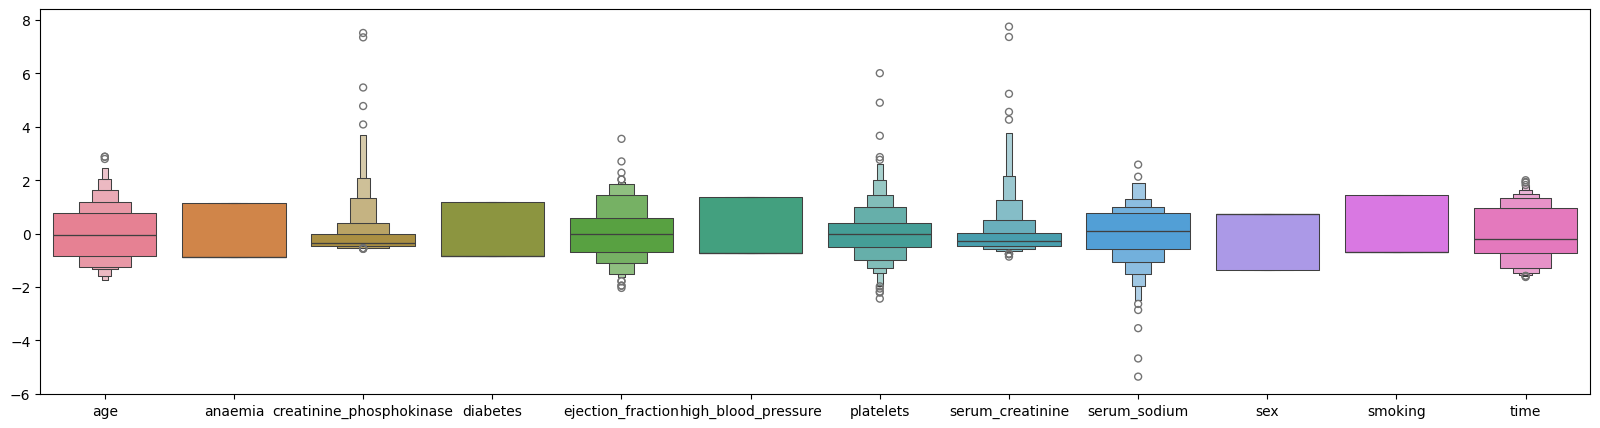

In [48]:
plt.figure(figsize=(20, 5))
sns.boxenplot(data=X_scaled)

In [65]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.35, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.35)

Step 4 : Model Building

1. SVM

In [66]:
model1 = svm.SVC()

In [67]:
model1.fit(X_train, Y_train)

SVC()

In [68]:
Y_predict = model1.predict(X_test)

In [69]:
Y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [70]:
Y_test

,DEATH_EVENT
294,0
255,0
191,0
290,0
145,0
...,...
109,0
230,1
278,0
53,1


In [71]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        71
           1       0.75      0.62      0.68        34

    accuracy                           0.81       105
   macro avg       0.79      0.76      0.77       105
weighted avg       0.80      0.81      0.80       105



2. ANN


In [72]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    # patience = 10,
    patience = 20,
    restore_best_weights = True,
)

model = Sequential()

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25)) # to avoid overfitting
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5)) # to avoid overfitting
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # for binary classification activation is sigmoid and for multiclass classification : sotfmax activation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# history = model.fit(X_train, Y_train, batch_size = 10, epochs = 100, validation_data = (X_test, Y_test), callbacks = [early_stopping])
history = model.fit(X_train, Y_train, batch_size = 35, epochs = 100, validation_data = (X_test, Y_test), callbacks = [early_stopping], validation_split = 0.25)
# history = model.fit(X_train, Y_train, batch_size = 25, epochs = 100, validation_data = (X_test, Y_test), callbacks = [early_stopping], validation_split = 0.25)
# history = model.fit(X_train, Y_train, batch_size = 25, epochs = 100, callbacks = [early_stopping], validation_split = 0.25)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7991 - loss: 0.3858 - val_accuracy: 0.8190 - val_loss: 0.4508
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8171 - loss: 0.3678 - val_accuracy: 0.8190 - val_loss: 0.4525
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8512 - loss: 0.3532 - val_accuracy: 0.8190 - val_loss: 0.4545
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7926 - loss: 0.4074 - val_accuracy: 0.8190 - val_loss: 0.4558
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8128 - loss: 0.4255 - val_accuracy: 0.8190 - val_loss: 0.4586
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7773 - loss: 0.3294 - val_accuracy: 0.8190 - val_loss: 0.4608
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8176 - loss: 0.3234 - val_accuracy: 0.8190 - val_loss: 0.4624
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8548 - loss: 0.3592 - val_accuracy: 0.8190 - val_loss:

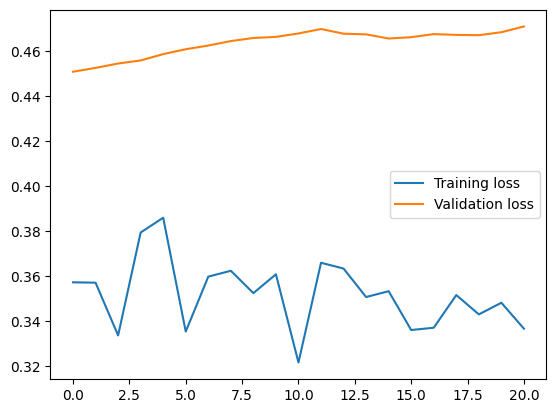

In [89]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label = "Training loss")
plt.plot(history_df.loc[:, ['val_loss']], label = "Validation loss")
plt.legend()
plt.show()

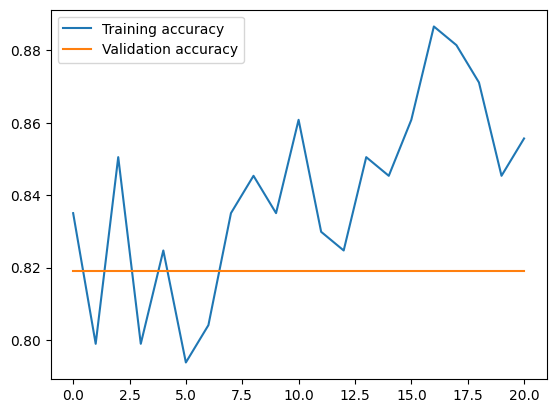

In [90]:
plt.plot(history_df.loc[:, ['accuracy']], label = "Training accuracy")
plt.plot(history_df.loc[:, ['val_accuracy']], label = "Validation accuracy")
plt.legend()
plt.show()

In [91]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [92]:
y_pred = (y_pred > 0.5)

In [93]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        71
           1       0.73      0.71      0.72        34

    accuracy                           0.82       105
   macro avg       0.79      0.79      0.79       105
weighted avg       0.82      0.82      0.82       105

